--- BÖLÜM 1: VERİ ÖN İŞLEME BAŞLADI ---
Ham Veri Seti yüklendi. İlk 5 satır:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB

Temizlenmiş veri 'cleaned_CCPP_final.csv' olarak kaydedildi.
--- BÖLÜM 1: PANDAS VE NUMPY TAMAMLANDI ---

--- BÖLÜM 2: GÖRSELLEŞTİRME BAŞLADI ---

--- İSTATİSTİKLER TABLOSU ---

     count         mean        std     min        25%       50%      75%  \
AT  9568.0    19.6512

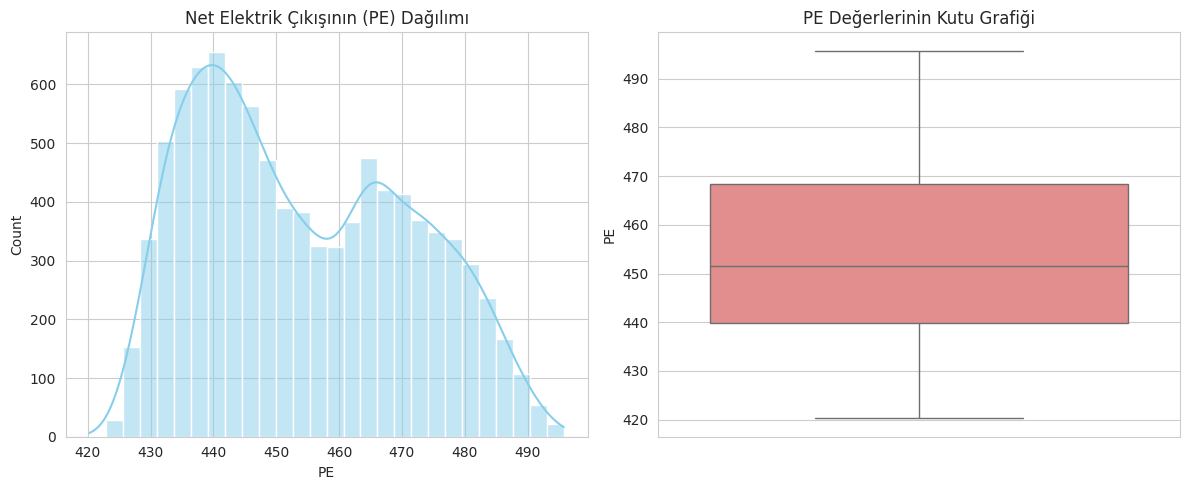

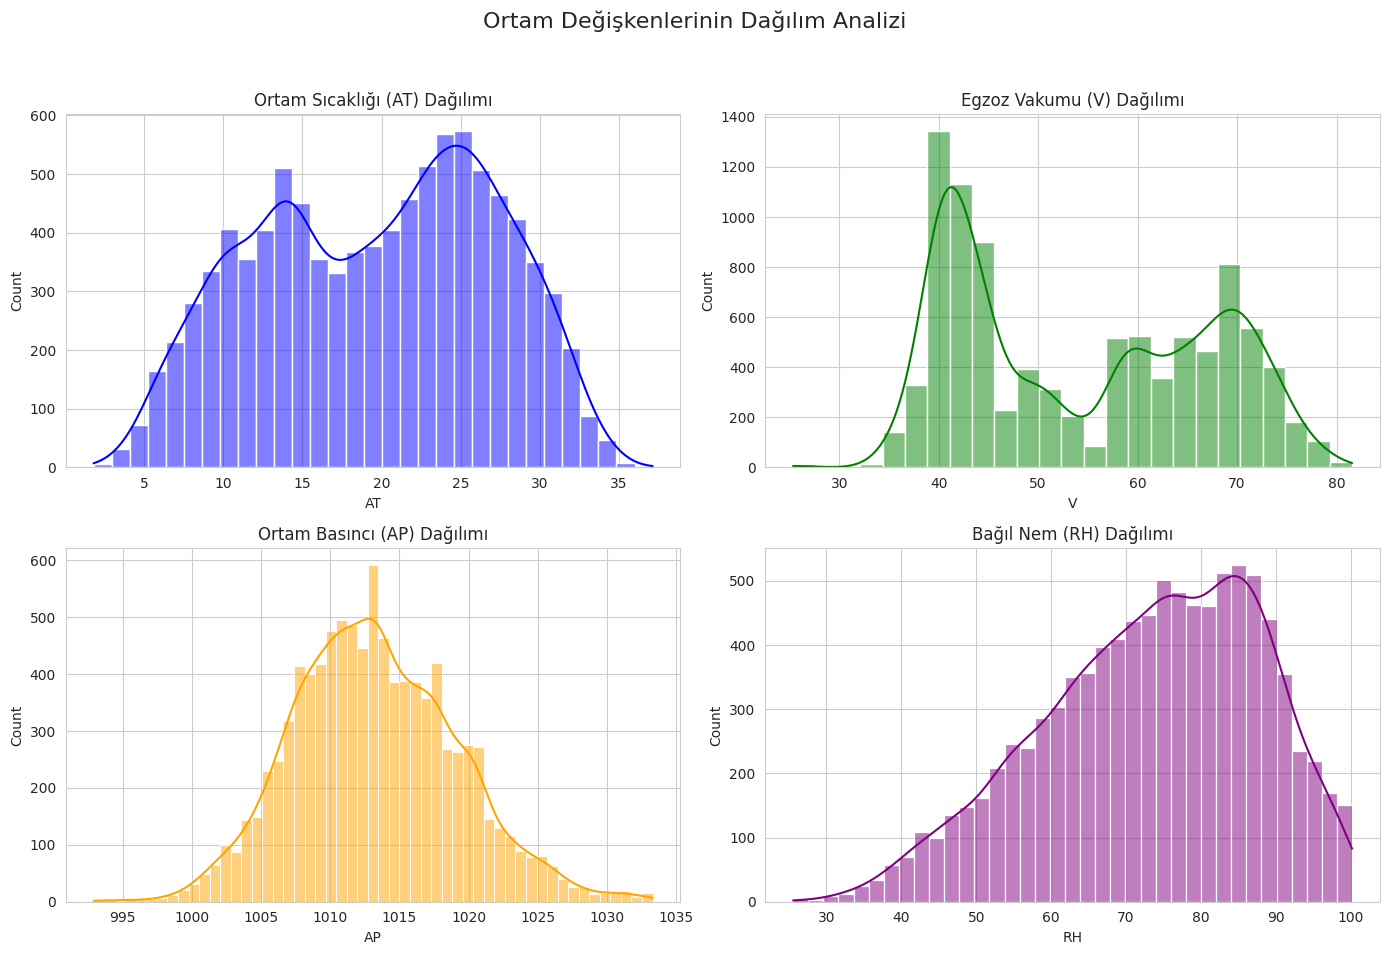

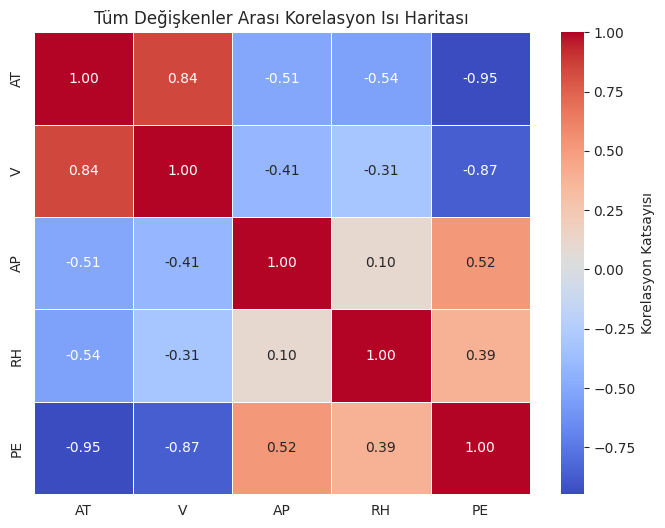

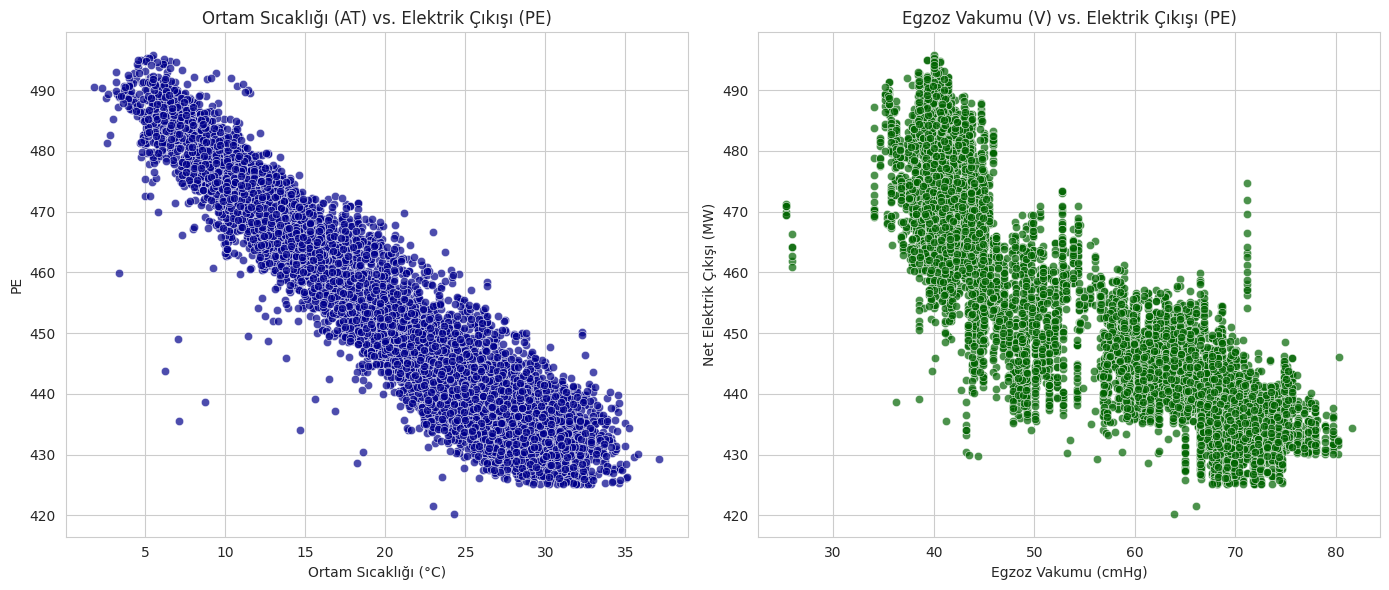

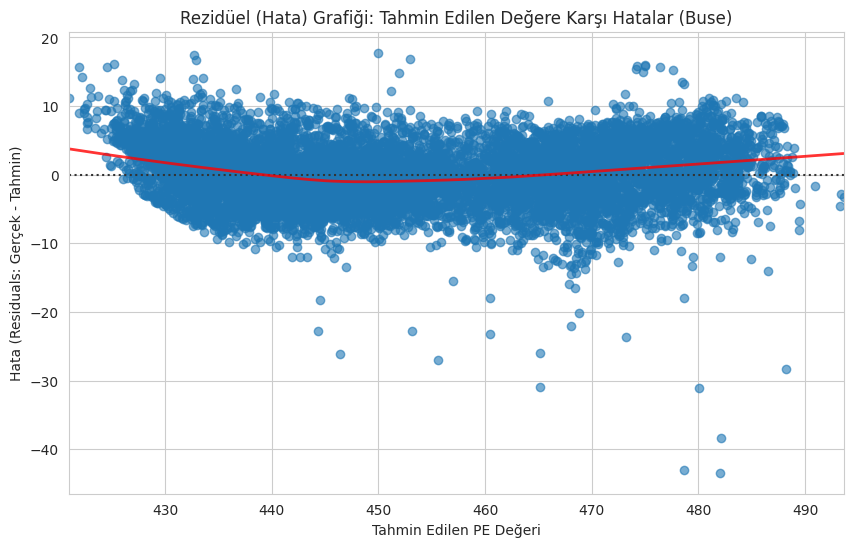

--- BÖLÜM 2: GRAFİKLER TAMAMLANDI ---

--- BÖLÜM 3: MAKİNE ÖĞRENMESİ BAŞLADI ---

--- MODEL PERFORMANS METRİKLERİ (Aleyna) ---
RMSE (Root Mean Squared Error)    : 4.502633229532186
R2 Skoru (Açıklanan Varyans)      : 0.9301046431962188


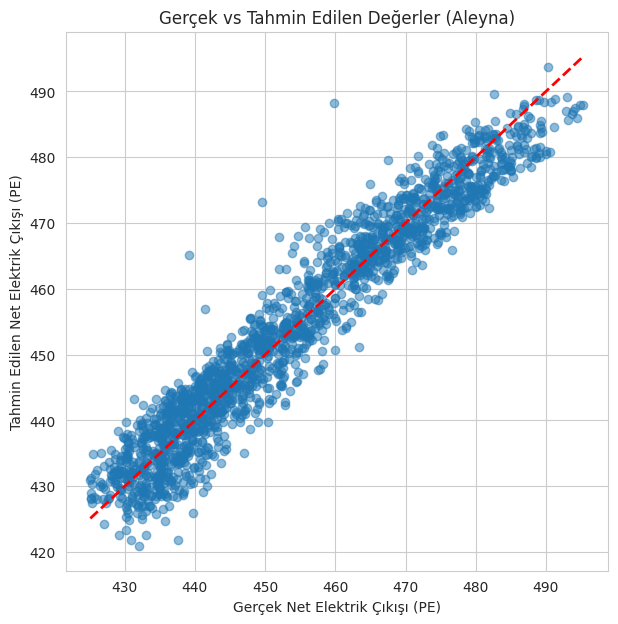

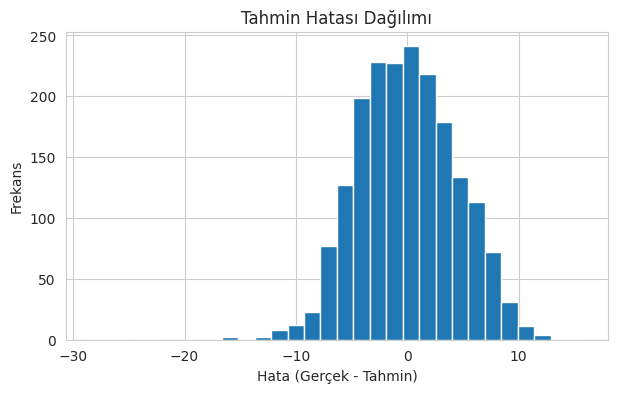

--- BÖLÜM 3: DOĞRUSAL REGRESYON TAMAMLANDI ---


In [1]:
# =======================================================================
# PROJE GENEL KURULUM VE KÜTÜPHANELER
# =======================================================================

# 1. Veri Yapısı ve Analizi (Pandas/Numpy)
import pandas as pd
import numpy as np

# 2. Görselleştirme Kütüphaneleri (Matplotlib/Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Makine Öğrenmesi Kütüphaneleri (Scikit-learn)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Grafik ayarlarını yapılandırma
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# =======================================================================
# BÖLÜM 1: VERİ ÖN İŞLEME VE KEŞİF (PANDAS / NUMPY)
# =======================================================================

print("--- BÖLÜM 1: VERİ ÖN İŞLEME BAŞLADI ---")

# -----------------------------------------------------------------------
# 1.1 Veri Yükleme
# -----------------------------------------------------------------------

# Ham Veri Setini Yükleme: 'CCPP_data.csv' dosyasını yüklüyoruz.
try:
    df = pd.read_csv("CCPP_data.csv")
    print("Ham Veri Seti yüklendi. İlk 5 satır:")
    print(df.head())
    df.info()
except FileNotFoundError:
    print("HATA: 'CCPP_data.csv' dosyası bulunamadı. Lütfen kontrol edin.")
    raise

# -----------------------------------------------------------------------
# 1.2 Yeni Özellik (Feature) Oluşturma
# -----------------------------------------------------------------------

# Ortam Sıcaklığını ("AT") medyan değere göre kategorilere ayırıyoruz.
# np.where, koşula göre 'High' veya 'Low' değerini atar.
df["AT_level"] = np.where(df["AT"] > df["AT"].median(), "High", "Low")

# Ortam Basıncını ("AP") verileri 3 eşit aralığa (bins=3) bölerek kategorik hale getiriyoruz.
# Etiketler: Low (Düşük), Mid (Orta) ve High (Yüksek).
df["AP_level"] = pd.cut(df["AP"], bins=3, labels=["Low", "Mid", "High"])

# -----------------------------------------------------------------------
# 1.3 Veri Ölçekleme (Min-Max Normalizasyonu)
# -----------------------------------------------------------------------

# Sadece sayısal sütunları seçiyoruz. Bu, sonraki bölümlerdeki hataları da engeller.
df_numeric = df.select_dtypes(include=np.number)
scaler = MinMaxScaler()
# Normalleştirmeyi [0, 1] aralığına uyguluyoruz.
df_scaled_values = scaler.fit_transform(df_numeric)

# -----------------------------------------------------------------------
# 1.4 Temizlenmiş Veriyi Kaydetme
# -----------------------------------------------------------------------

# İşlenmiş veriyi, grafik ve makine öğrenmesi bölümlerinin kullanması için kaydediyoruz.
df.to_csv("cleaned_CCPP_final.csv", index=False)
print("\nTemizlenmiş veri 'cleaned_CCPP_final.csv' olarak kaydedildi.")
print("--- BÖLÜM 1: PANDAS VE NUMPY TAMAMLANDI ---\n")

# =======================================================================
# BÖLÜM 2: GÖRSELLEŞTİRME VE KEŞİFÇİ VERİ ANALİZİ (GRAFİKLER)
# =======================================================================

print("--- BÖLÜM 2: GÖRSELLEŞTİRME BAŞLADI ---")

# -----------------------------------------------------------------------
# 2.1 Veri Yükleme ve Özet İstatistikler
# -----------------------------------------------------------------------
df = pd.read_csv("cleaned_CCPP_final.csv")
# SADECE SAYISAL VERİYİ TEKRAR SEÇİYORUZ (Korelasyon için gerekli).
df_numeric = df.select_dtypes(include=np.number)

descriptive_stats = df_numeric.describe().transpose()
print("\n--- İSTATİSTİKLER TABLOSU ---\n")
print(descriptive_stats)
descriptive_stats.to_csv('betimleyici_istatistikler.csv')

# Korelasyon SADECE sayısal verilerle hesaplanıyor (ValueError'ı engeller).
correlation_table = df_numeric.corr()
print("\n--- KORELASYON KATSAYILARI TABLOSU ---\n")
print(correlation_table['PE'].sort_values(ascending=False))
correlation_table.to_csv('korelasyon_tablosu.csv')

# -----------------------------------------------------------------------
# 2.2 Hedef Değişken (PE) Dağılım Analizi
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # Histogram: Dağılım ve yoğunluk kontrolü.
sns.histplot(df['PE'], kde=True, color='skyblue')
plt.title('Net Elektrik Çıkışının (PE) Dağılımı')

plt.subplot(1, 2, 2) # Kutu Grafiği: Aykırı değer kontrolü.
sns.boxplot(y=df['PE'], color='lightcoral')
plt.title('PE Değerlerinin Kutu Grafiği')
plt.tight_layout()
plt.show()
#

# -----------------------------------------------------------------------
# 2.3 Özellik Değişkenlerinin Dağılım Analizi
# -----------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # 2x2 matris şeklinde 4 alt grafik oluştur.

# 1. Grafik: Ortam Sıcaklığı (AT) Dağılımı
sns.histplot(df['AT'], kde=True, ax=axes[0, 0], color='blue').set(title='Ortam Sıcaklığı (AT) Dağılımı'),

# 2. Grafik: Egzoz Vakumu (V) Dağılımı
sns.histplot(df['V'], kde=True, ax=axes[0, 1], color='green').set(title='Egzoz Vakumu (V) Dağılımı'),

# 3. Grafik: Ortam Basıncı (AP) Dağılımı
sns.histplot(df['AP'], kde=True, ax=axes[1, 0], color='orange').set(title='Ortam Basıncı (AP) Dağılımı'),

# 4. Grafik: Bağıl Nem (RH) Dağılımı
sns.histplot(df['RH'], kde=True, ax=axes[1, 1], color='purple').set(title='Bağıl Nem (RH) Dağılımı')
# Son grafik olduğu için bu satırda virgül/parantez kapanışına gerek yoktur.

plt.suptitle('Ortam Değişkenlerinin Dağılım Analizi', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -----------------------------------------------------------------------
# 2.4 Korelasyon Isı Haritası (Heatmap)
# -----------------------------------------------------------------------
corr_matrix = df_numeric.corr() # Sayısal veriler kullanılarak hesaplanır.

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,    # Değerleri göster.
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Korelasyon Katsayısı'})
plt.title('Tüm Değişkenler Arası Korelasyon Isı Haritası')
plt.show()
#

# -----------------------------------------------------------------------
# 2.5 İlişki Analizi (Scatter Plot)
# -----------------------------------------------------------------------

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # AT vs PE (Negatif ilişkiyi gösterir)
sns.scatterplot(x=df['AT'], y=df['PE'], color='darkblue', alpha=0.7)
plt.title('Ortam Sıcaklığı (AT) vs. Elektrik Çıkışı (PE)')
plt.xlabel('Ortam Sıcaklığı (°C)')

plt.subplot(1, 2, 2) # V vs PE (Negatif ilişkiyi gösterir)
sns.scatterplot(x=df['V'], y=df['PE'], color='darkgreen', alpha=0.7)
plt.title('Egzoz Vakumu (V) vs. Elektrik Çıkışı (PE)')
plt.xlabel('Egzoz Vakumu (cmHg)')

plt.ylabel('Net Elektrik Çıkışı (MW)')
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------
# 2.6 Residuel Grafiği
# -----------------------------------------------------------------------
# NOT: Bu model, grafikler için geçici olarak tüm veri üzerinde eğitilmiştir.
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
model_buse = LinearRegression().fit(X, y) # Model eğitiliyor.
y_pred_buse = model_buse.predict(X)
residuals_buse = y - y_pred_buse # Hatalar hesaplanıyor.

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_buse, y=residuals_buse, lowess=True, # Hataların dağılımı.
              line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8},
              scatter_kws={'alpha': 0.6})
plt.title('Rezidüel (Hata) Grafiği: Tahmin Edilen Değere Karşı Hatalar (Buse)')
plt.xlabel('Tahmin Edilen PE Değeri')
plt.ylabel('Hata (Residuals: Gerçek - Tahmin)')
plt.show()

print("--- BÖLÜM 2: GRAFİKLER TAMAMLANDI ---\n")

# =======================================================================
# BÖLÜM 3: MAKİNE ÖĞRENMESİ (DOĞRUSAL REGRESYON)
# =======================================================================

print("--- BÖLÜM 3: MAKİNE ÖĞRENMESİ BAŞLADI ---")

# ------------------------------------------------
# 1) VERİ SETİNİ BÖLME
# ------------------------------------------------
# Özellikler ve hedef tekrar tanımlanıyor.
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Veri setini Eğitim (%80) ve Test (%20) kümelerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------
# 2) MODELİ EĞİTME VE TAHMİN
# ------------------------------------------------
# Linear Regression model nesnesi oluşturuluyor.
model_aleyna = LinearRegression()
# Modeli eğitim verisi üzerinde eğitiyoruz (fit).
model_aleyna.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılıyor.
y_pred_aleyna = model_aleyna.predict(X_test)

# ------------------------------------------------
# 3) PERFORMANS METRİKLERİ
# ------------------------------------------------
# Modelin başarısını değerlendirmek için metrikler hesaplanıyor.
mae = mean_absolute_error(y_test, y_pred_aleyna)
mse = mean_squared_error(y_test, y_pred_aleyna)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_aleyna)

print("\n--- MODEL PERFORMANS METRİKLERİ (Aleyna) ---")
print("RMSE (Root Mean Squared Error)    :", rmse)
print("R2 Skoru (Açıklanan Varyans)      :", r2)

# ------------------------------------------------
# 4) MODEL GÖRSELLEŞTİRMESİ
# ------------------------------------------------

# 4.1) Gerçek vs Tahmin Edilen Değerler Grafiği
plt.figure(figsize=(7, 7))
# Tahminler (y_pred_aleyna) Gerçek Değerlere (y_test) karşı çizilir.
plt.scatter(y_test, y_pred_aleyna, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # y=x doğrusu (İdeal tahmin çizgisi)
plt.title("Gerçek vs Tahmin Edilen Değerler (Aleyna)")
plt.xlabel("Gerçek Net Elektrik Çıkışı (PE)")
plt.ylabel("Tahmin Edilen Net Elektrik Çıkışı (PE)")
plt.grid(True)
plt.show()

# 4.2) Hata dağılımı (Histogram)
# Hata (errors) değişkeni hesaplanıyor.
errors = y_test - y_pred_aleyna

plt.figure(figsize=(7, 4))
# Hata dağılımı çiziliyor. İdeal olarak, normal dağılım göstermelidir.
plt.hist(errors, bins=30)
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.title("Tahmin Hatası Dağılımı")
plt.grid(True)
plt.show()

print("--- BÖLÜM 3: DOĞRUSAL REGRESYON TAMAMLANDI ---")

# =======================================================================
# PROJE SONU
# =======================================================================